# DSCI 100 Term Project
- name: Geoff Acabado
- student number: 59285189

## Introduction
For this project, we will be looking how does different player characteristics correlate to thir probability of being subscribed to a game news paper. Note that there are markdown cells that guides the reader through the analysis being done but a more extensive guide and analysis can be found in the actual report. This ipynb file mainlt cointains the code necessary to achieve the goal of this project. 

In [41]:
#code 0.1
#Some libraries to install
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

# We need to set this seed so that all results in this notebook can be replicated
set.seed(9999)

### Tidying the data

In [42]:
#Code 0.2
# install the data needed
player_data = read_csv("players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


### Data explorations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


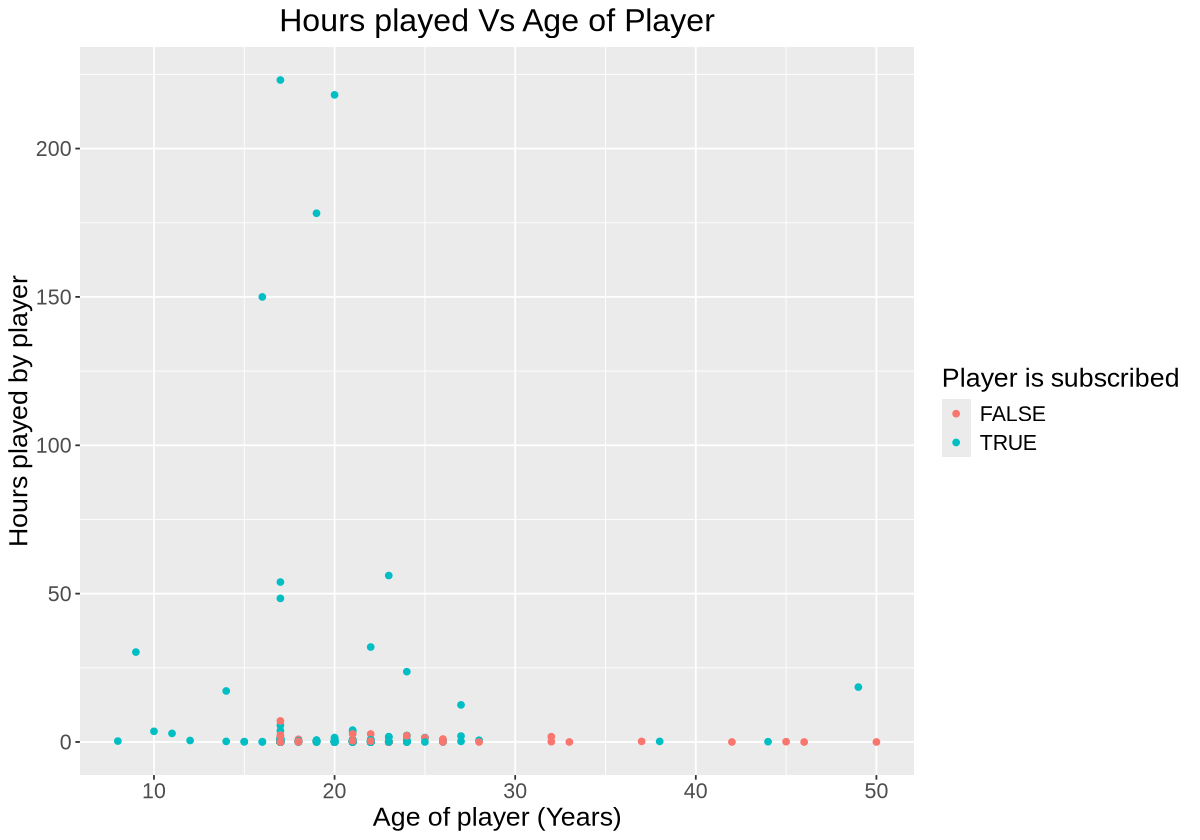

In [43]:
#Code 1.1
#Lets explore relationships between hours played, age and whether they are subscibed to game newspaper
options(repr.plot.height = 7, repr.plot.width = 10)
player_plot = player_data |>
    ggplot(aes(y = played_hours	, x = Age, color = subscribe)) +
    geom_point() +
    labs(
        title = "Hours played Vs Age of Player",
        y = "Hours played by player",
        x = "Age of player (Years)",
        colour = "Player is subscribed" ) +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5))
player_plot

#### Figure 1.1
The plot above shows the relationship between the age of the player and the number of hours they have played Minecraft. It can be observed that most of the data points are concentrated at lower hours played. It might be beneficial to use a logarithmic scale on the y-axis to see how data points differ from each other especially for lower hours played values.

#### Code 1.1 Warning
The code above gave us a warning message indicating that there are 2 datapoints that have missing values or are out of range. Let's look for those values.

In [44]:
missing_values = player_data |>
    filter(is.na(Age))
missing_values

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


It looks like we found the 2 missing values so there is no need to see if there are any values out of scale. Lets proceed to making the scale of the data better

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


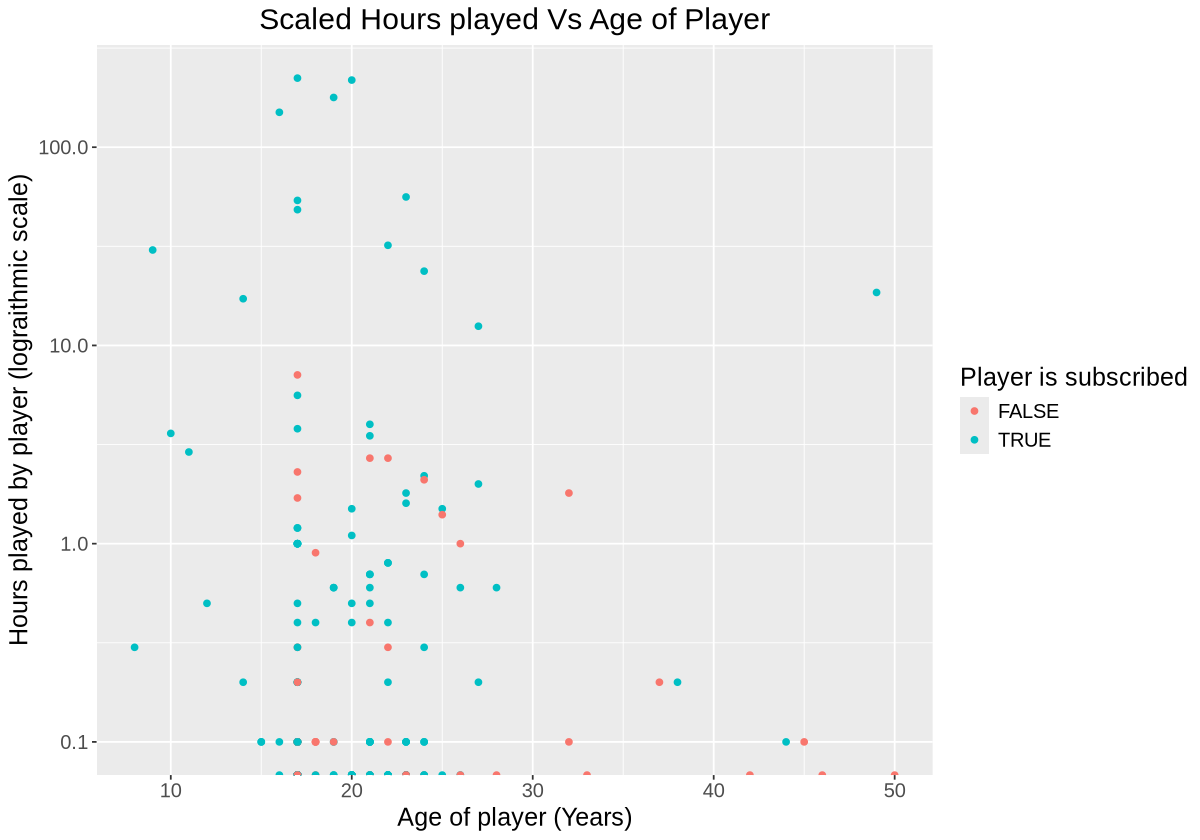

In [45]:
#Code 1.2
#Lets explore relationships between hours played, age and whether they are subscibed to game newspaper
player_plot_1 = player_data |>
    ggplot(aes(y = played_hours	, x = Age, color = subscribe)) +
    geom_point() +
    scale_y_log10() +
    labs(
        title = "Scaled Hours played Vs Age of Player",
        y = "Hours played by player (lograithmic scale)",
        x = "Age of player (Years)",
        colour = "Player is subscribed" ) +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))
player_plot_1



#### Figure 1.2
From the figure above, it is easy to see that there are no obvious pattern between between hours played by the player and their age. Both variables also do not seem to be correlated with whether the players are subscribed or not. It is intersting to see however that everyone who played for 10 hours or more are all subscribed to a game newspaper. Another observation we see is that most players are arround 20 years old indicating that this is minecraft is popular among this demographic

#### Code 1.2 Warning
There was a warning that the logarithmic transformation turned the some 0s to infinity but it looks like it did not affect the purpose of our visualization that much. All of the supposedly 'negatively infinite' values remained at the bottom of the graph. 

### Data Analysis Plan

- Build a classification model that lets us categorize a player according to whether or not they are subscribed in a gaming newspaper
- Use their hours played in the game as well as their age as predictors
- Split the data into training and testing data
- Use a k-nn algorythm with a 5 fold cross validation to verify what the best K-value should be. 
- A K value that will give highest accuracy when used on testing data will be used to build the final model
- Use different metrics such as accuracy, precision, and recall to determine if data is useful in real world

### Model Tuning
Please refer to the actual report 

In [46]:
#Code 2.1
# Clean up data
player_data_clean = player_data |>
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as.factor(subscribe))

In [47]:
#Code 2.2
#split the data
player_data_split = initial_split(player_data_clean, prop = 0.7, strata = subscribe)
player_data_training = training(player_data_split)
player_data_testing = testing(player_data_split)

In [48]:
#Code 2.3
# Tuning the model with 5 fold cross validation
player_data_vfold = vfold_cv(player_data_training, v = 5, strata = subscribe)

In [49]:
#Code 2.4
#make recipe
player_data_recipe = recipe(subscribe ~., data = player_data_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

In [50]:
#Code 2.5
#Tune model
knn_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [51]:
#Code 2.6
#Get results
k_vals = tibble(neighbors = 1:25)
knn_results = workflow() |>
    add_recipe(player_data_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = player_data_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy", !is.na(mean))

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





#### Code 2.6 Warning
During hyperparameter tuning, warnings related to row mismatches were encountered when certain K values exceeded the number of available observations within some cross-validation folds. These cases were automatically handled by the tuning procedure, and valid results were obtained for all feasible parameter combinations. Therefore, these warnings did not affect the final analysis.

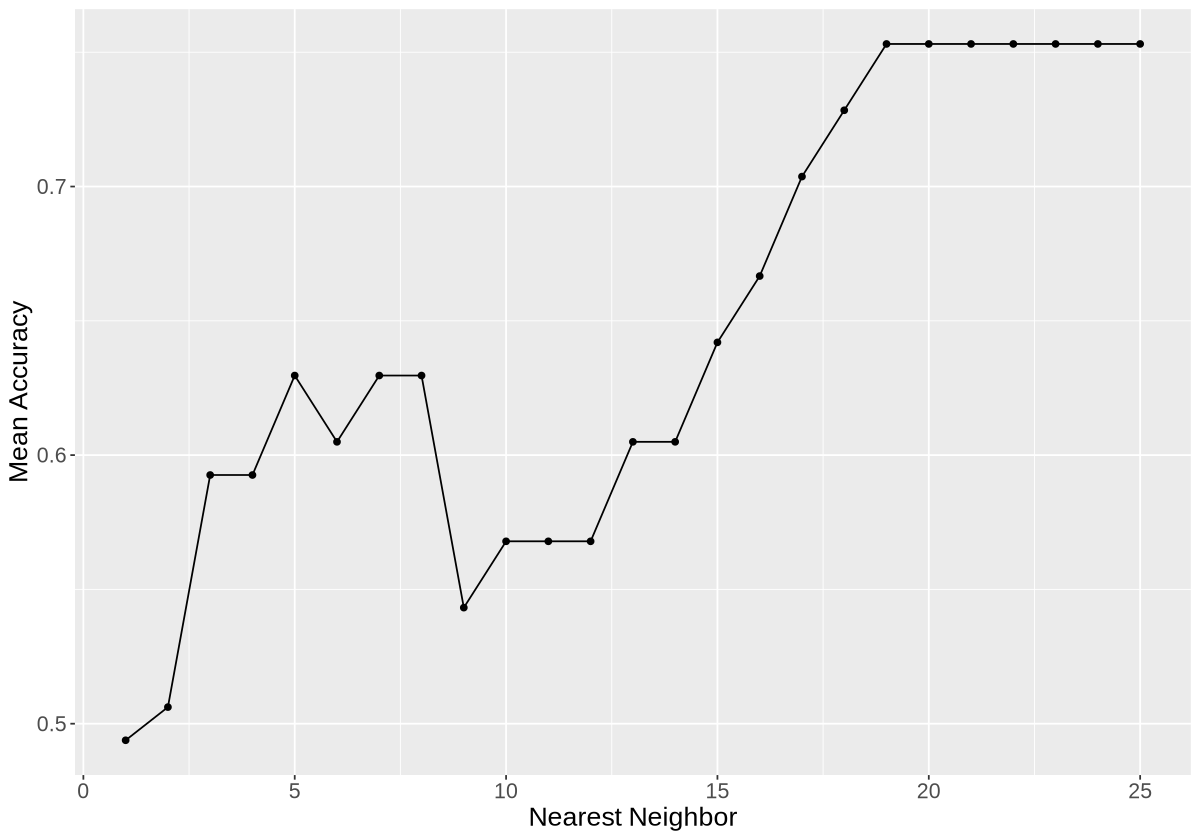

In [52]:
#Code 2.7
options(repr.plot.height = 7, repr.plot.width = 10)
knn_results_plot = knn_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Nearest Neighbor" , y = "Mean Accuracy")+
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5))
knn_results_plot

#### Figure 2.1
This graph shows mean accuracy for different values of K. We see that there is a local maximum at K = 7 and 8 which are probably the best K for this data set. Let's just chose 7. We see that after K = 10, the accuracy increases again but that is probably just because there are a lot more people subscribed than not subscribed to news paper. As K increaases, the alogrythm will just classify any point as "TRUE" which results in high accuracy but is not very useful in this context.

### Final Model Building and Evaluation

In [53]:
#Code 3.1
# Create final model
final_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")

final_fit <- workflow() |>
    add_recipe(player_data_recipe) |>
    add_model(final_spec) |>
    fit(data = player_data_training)

In [54]:
#Code 3.2
#Evaluate final model
test_predictions <- predict(final_fit, player_data_testing) |>
  bind_cols(player_data_testing)

In [55]:
#Code 3.3
#print the different metrics to asses the overall quality of the model
eval_metrics <- bind_rows(
  accuracy(test_predictions, truth = subscribe, estimate = .pred_class),
  precision(test_predictions, truth = subscribe, estimate = .pred_class),
  recall(test_predictions, truth = subscribe, estimate = .pred_class),
)

eval_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6333333
precision,binary,0.3500000
recall,binary,0.4375000


### Discussion and Conclusions (See report for more extensive analysis)
We see that accuracy is only 63.33% which is only a little bit better than random chance. We also see that precision is 35% and recall is 43.75% which are both bad. These values suggest that the model does not perform reliably, especially when it comes to correctly identifying positive cases. The low precision means that many of the predicted positives were actually incorrect, while the low recall shows that the model missed a large portion of the actual positive cases. One possible reason for this could be an imbalance in the data, where one class is much more common than the other. To improve the model, further testing with different settings and better preparation of the data may be helpful. Exploring other classification methods in the future may also lead to better performance.
